Homework 4 Spring 2023

Due Date - 04/19/2023, 11:59PM



Name: <br> Adelina Yelemessova

UNI: <ay2513> ay2513

### PART-1: Neural Network from the scratch

For this part, you are not allowed to use any library other than numpy.

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) with the network image uploaded

The weight matrix for the hidden layer is W1 and has bias b1.

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is sigmoid for both hidden and output layer

Loss function is the MSE loss

Refer to the below dictionary for dimensions for each matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [ ]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
#Implement the forward pass
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2']) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [ ]:
# Implement the backward pass
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    
    dLdb2 = np.sum(dLdZ2, axis=0)
    
    dLdH = np.outer(dLdZ2, weights['W2'])
    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1) * (1 - sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    
    dLdb1 = np.sum(dLdZ1, axis=0)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L

In [ ]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [ ]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596,  0.00262019],
       [-0.00030765, -0.00024188],
       [-0.00034768, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066])

# PART 2 MNIST Dataset

Description: The MNIST dataset is a widely-used benchmark dataset in the field of machine learning and computer vision. It consists of 70,000 grayscale images of handwritten digits (0-9), with 60,000 images in the training set and 10,000 images in the test set. The images are 28x28 pixels in size, and each pixel is represented by an integer value between 0 and 255, with 0 representing a white pixel and 255 representing a black pixel.

In [ ]:
from tensorflow.keras.datasets import mnist

# The MNIST dataset and the labels have been provided for you
(x_dev, y_dev), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

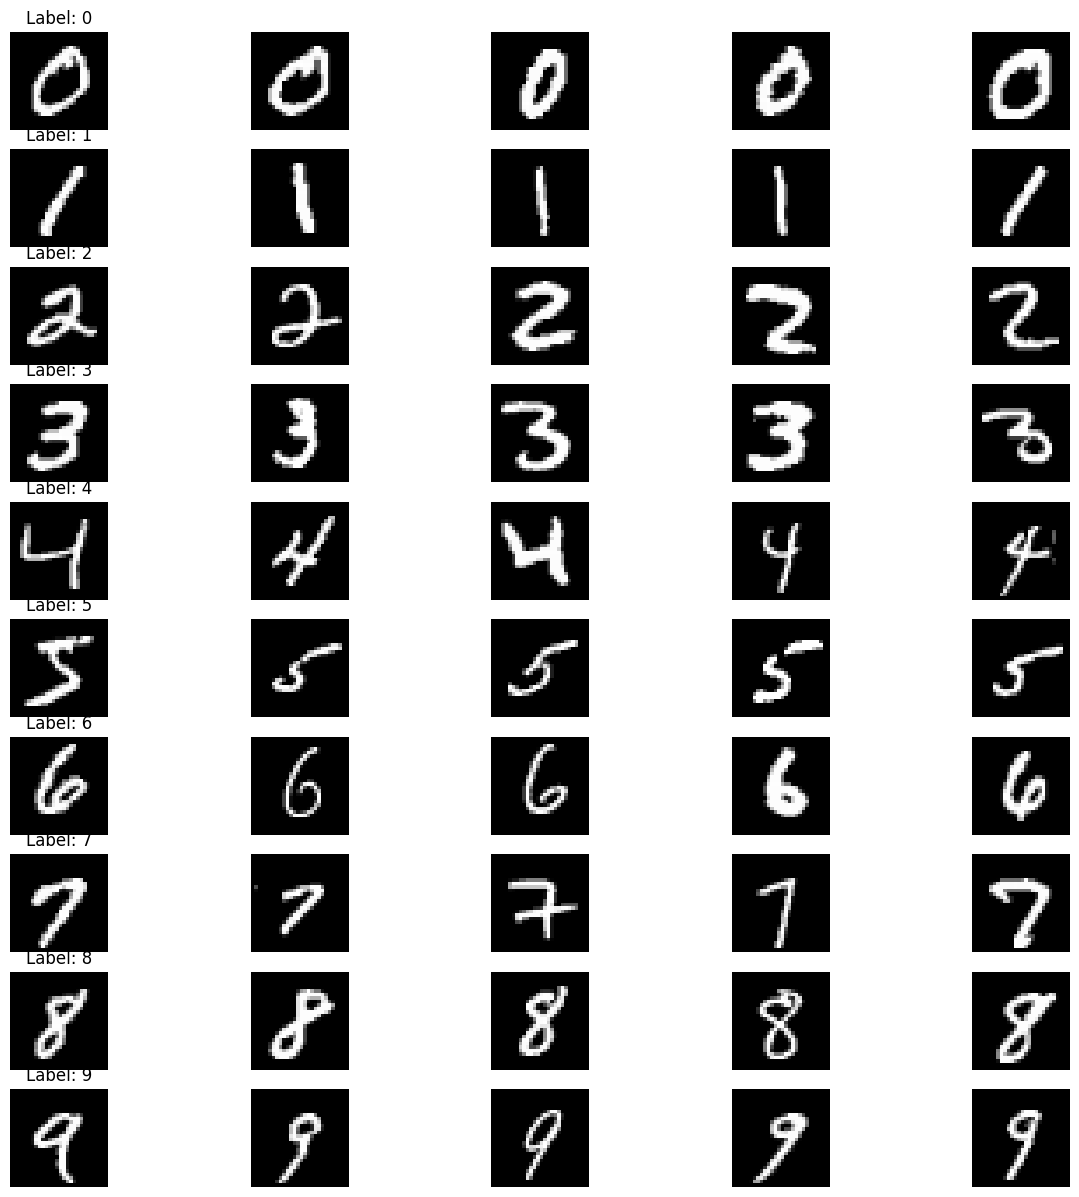

In [ ]:
samples = {label: [] for label in LABELS}

for x, y in zip(x_dev, y_dev):
    label = str(y)
    if len(samples[label]) < 5:
        samples[label].append(x)
        
        if all(len(s) == 5 for s in samples.values()):
            break
fig, axes = plt.subplots(10, 5, figsize=(15, 15))

for i, label in enumerate(LABELS):
    for j, sample in enumerate(samples[label]):
        axes[i, j].imshow(sample, cmap='gray')
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(f"Label: {label}")

plt.show()


2.2  Preparing the dataset


1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [ ]:
# shapes
print("x_dev shape:", x_dev.shape)
print("y_dev shape:", y_dev.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# step 2
x_dev_flat = x_dev.reshape(x_dev.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("x_dev_flat shape:", x_dev_flat.shape)
print("x_test_flat shape:", x_test_flat.shape)

# step 3
x_dev_std = x_dev_flat.astype('float32') / 255
x_test_std = x_test_flat.astype('float32') / 255

# train-test split 
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_dev_std, y_dev, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

x_dev shape: (60000, 28, 28)
y_dev shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
x_dev_flat shape: (60000, 784)
x_test_flat shape: (10000, 784)
x_train shape: (48000, 784)
y_train shape: (48000,)
x_val shape: (12000, 784)
y_val shape: (12000,)


2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

2.3.1) Comment briefly on importance of activation functions used.

Activation functions are important in neural networks because they introduce non-linear properties, allowing network to learn complex patterns and approximate non-linear functions. 

we use two activation functions:
- ReLU: used in hidden layers. Advantage in its simplicity and ability to solve the vanishing gradient problem which arises when gradients become too small during backpropagation. ReLU accelerates training and enhances network performance.

- Softmax: used in the output layer for multi-class classification; Softmax transforms the network's output into a probability distribution, ensuring the sum of all output probabilities equals 1. This helps predict and choose the most likely class.



2.4) Print out the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2.5) Do you think this number is dependent on the image height and width? 



The neural network input features depend on image height and width. We flattened 28x28 pixel images into one-dimensional vectors, giving each image 784 input features (28 * 28 = 784). The number of input features changed with image dimensions.
 When constructing a neural network, the size of the input layer must correspond to the number of input features.Thus, if the image height and width changed, the input shape specified in the first hidden layer would also need to change.

2.6) Use the right metric and  the right loss function and batch size, with Adam as the optimizer, train your model for 10 epochs .

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2590 - accuracy: 0.9248 - val_loss: 0.1594 - val_accuracy: 0.9544
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1126 - accuracy: 0.9664 - val_loss: 0.1068 - val_accuracy: 0.9680
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0789 - accuracy: 0.9750 - val_loss: 0.0942 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.1148 - val_accuracy: 0.9666
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0453 - accuracy: 0.9848 - val_loss: 0.0892 - val_accuracy: 0.9742
Epoch 6/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0945 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 0.0973 - val_accuracy:

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

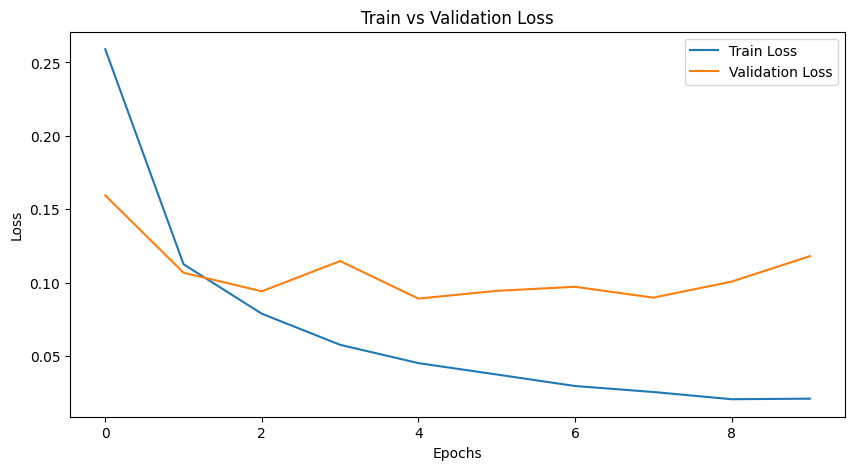

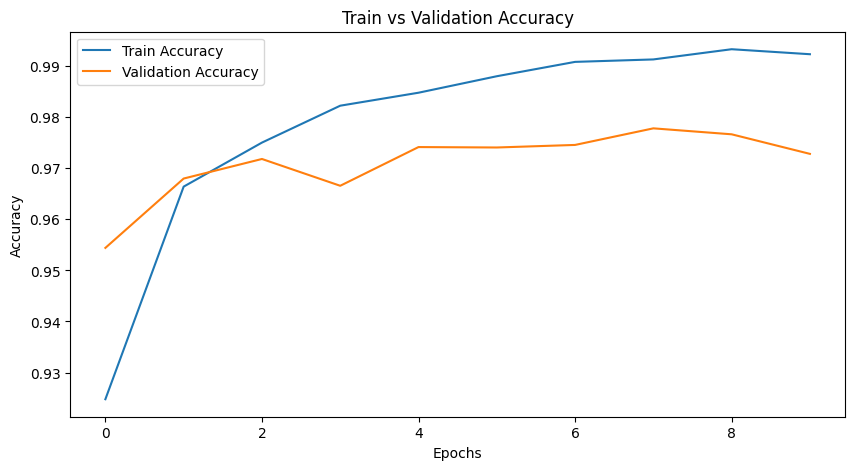

In [ ]:
# train vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

#  train vs validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()


2.8) Finally, report the metric chosen on test set

In [ ]:
# accuracy - is a chosen metric for the test set
x_test_flattened = x_test.reshape(x_test.shape[0], -1)
x_test_standardized = x_test_flattened / 255.0

test_loss, test_accuracy = model.evaluate(x_test_standardized, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


313/313 [==============================] - 1s 3ms/step - loss: 0.1113 - accuracy: 0.9746
Test Accuracy: 97.46%


2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P).

2/2 [==============================] - 0s 6ms/step


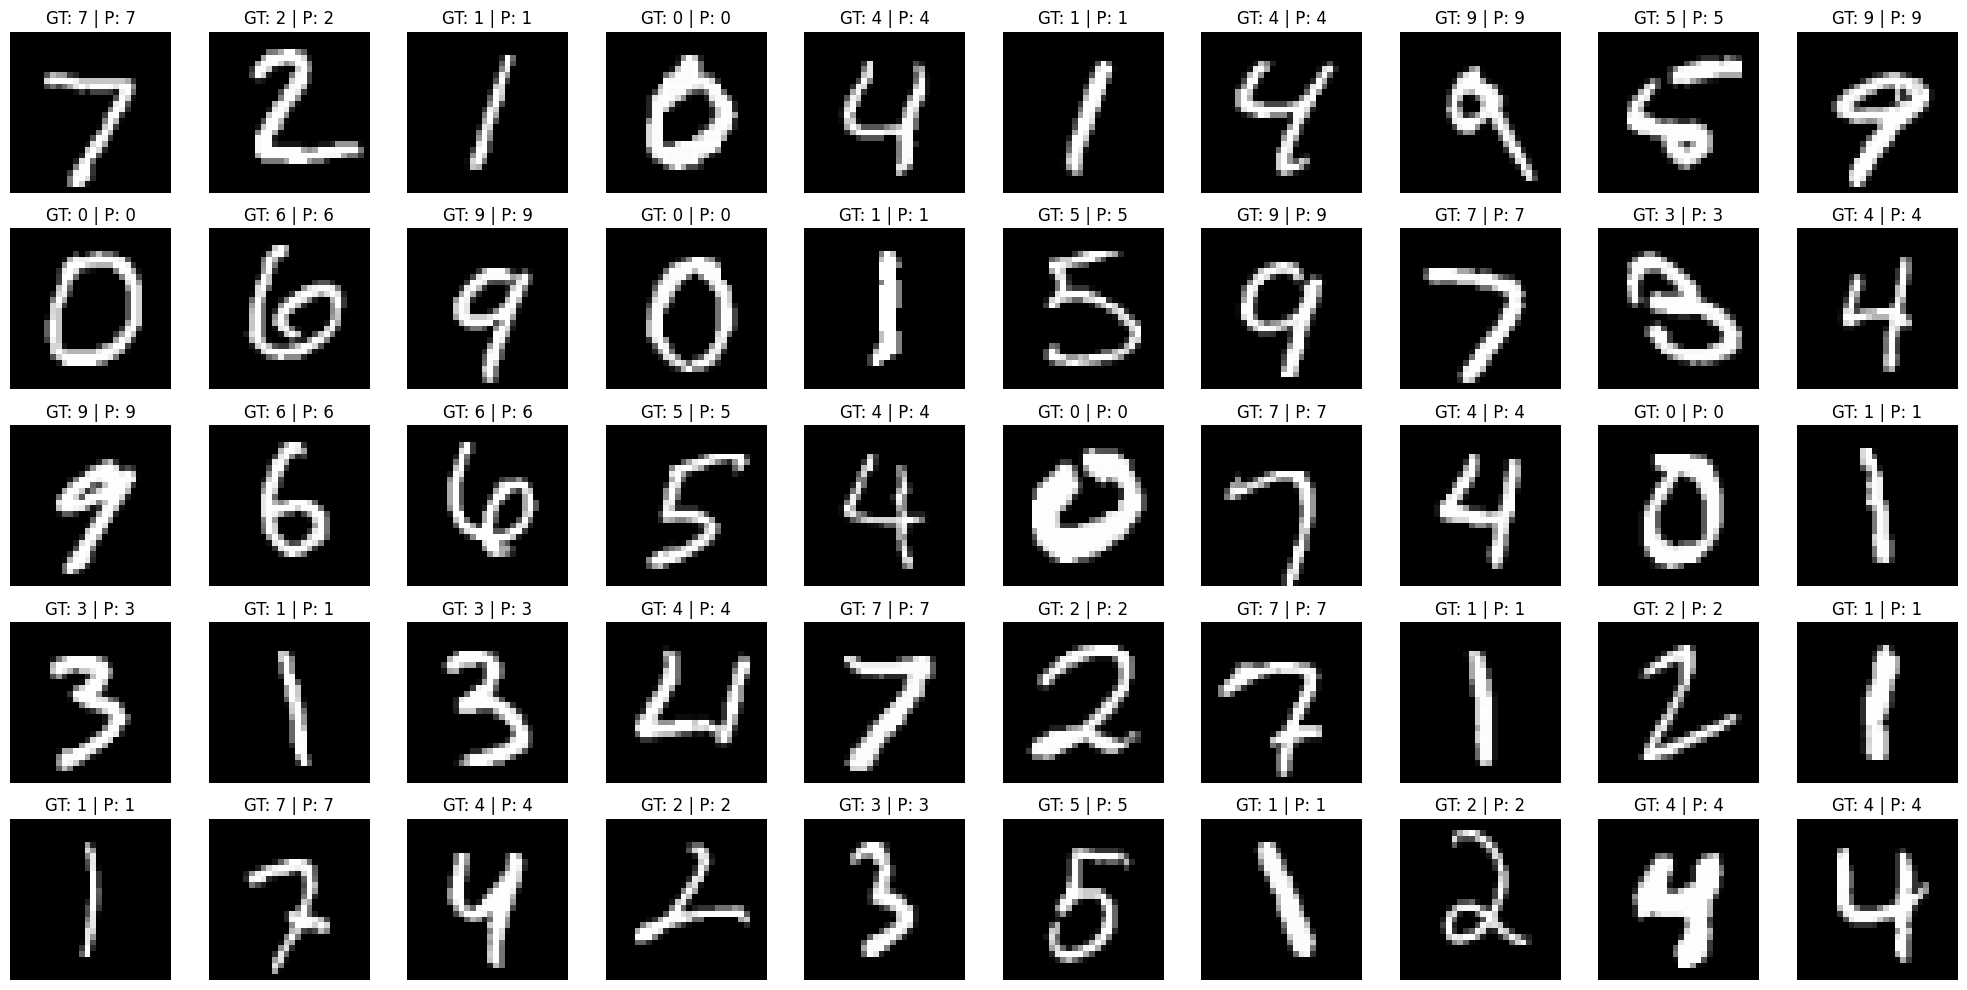

In [ ]:
predictions = model.predict(x_test_standardized[:50])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(20, 10))

for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title("GT: {} | P: {}".format(y_test[i], predicted_labels[i]))

plt.tight_layout()
plt.show()
